# 加载数据

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np
import mne

%matplotlib qt

In [2]:
# 读取脑电数据
data = sio.loadmat(r'D:\PycharmProjects\eegProject\data\Test_EEG\BD\00019946_EEG_ECClean.mat')
sample = data['EEG_ECClean']
eeg_data = sample["data"]
eeg_data[0][0]

array([[-9.3318409e-01, -4.5295892e+00, -9.3295441e+00, ...,
         7.4204499e-01, -4.8291296e-01, -3.5213247e-01],
       [-2.1513258e-01,  1.8957618e-01,  4.7348440e-02, ...,
         1.0110010e-01, -3.6961362e-03,  3.7441191e-01],
       [-4.8040164e-01, -2.3171883e+00, -5.4732032e+00, ...,
         2.2223921e+00,  5.2622545e-01, -1.7555401e-01],
       ...,
       [ 7.5062591e-01,  3.2922168e+00,  6.5809865e+00, ...,
        -1.1921538e+00,  5.8980548e-01,  1.2562073e+00],
       [ 6.9731843e-01,  1.1826644e+00,  3.2497039e+00, ...,
        -3.5442696e+00, -1.8063016e+00, -7.8050858e-01],
       [ 6.2298441e-01,  2.2280016e+00,  4.8461037e+00, ...,
        -1.5767463e+00, -3.5956651e-01,  3.7444386e-01]], dtype=float32)

In [3]:
eeg_data[0][0]

array([[-9.3318409e-01, -4.5295892e+00, -9.3295441e+00, ...,
         7.4204499e-01, -4.8291296e-01, -3.5213247e-01],
       [-2.1513258e-01,  1.8957618e-01,  4.7348440e-02, ...,
         1.0110010e-01, -3.6961362e-03,  3.7441191e-01],
       [-4.8040164e-01, -2.3171883e+00, -5.4732032e+00, ...,
         2.2223921e+00,  5.2622545e-01, -1.7555401e-01],
       ...,
       [ 7.5062591e-01,  3.2922168e+00,  6.5809865e+00, ...,
        -1.1921538e+00,  5.8980548e-01,  1.2562073e+00],
       [ 6.9731843e-01,  1.1826644e+00,  3.2497039e+00, ...,
        -3.5442696e+00, -1.8063016e+00, -7.8050858e-01],
       [ 6.2298441e-01,  2.2280016e+00,  4.8461037e+00, ...,
        -1.5767463e+00, -3.5956651e-01,  3.7444386e-01]], dtype=float32)

In [4]:
# 取通道名称
ch_names = sample['chanlocs'][0][0][0]['labels']
ch_names = [item[0] for item in ch_names]
print(ch_names)
# ch_types=['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6']


In [5]:
# 查看采样率
print(sample["srate"])

[[array([[200]], dtype=uint8)]]


In [6]:
# 创建MNE库的Raw对象
info = mne.create_info(
    ch_names=['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6'],
    ch_types='eeg',
    sfreq=sample["srate"]
)
raw = mne.io.RawArray(eeg_data[0][0], info)
print(raw)

Creating RawArray with float64 data, n_channels=16, n_times=35732
    Range : 0 ... 35731 =      0.000 ...   178.655 secs
Ready.
<RawArray | 16 x 35732 (178.7 s), ~4.4 MB, data loaded>


In [7]:
 # 查看脑电数据
scalings = {'eeg': 2}
raw.plot(n_channels=16,
                scalings=scalings,
                title='查看脑电数据',
                show=True)

plt.show()

Using qt as 2D backend.
Opening raw-browser...


Effective window size : 10.240 (s)


D:\local temp\ipykernel_16008\2573479875.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd()


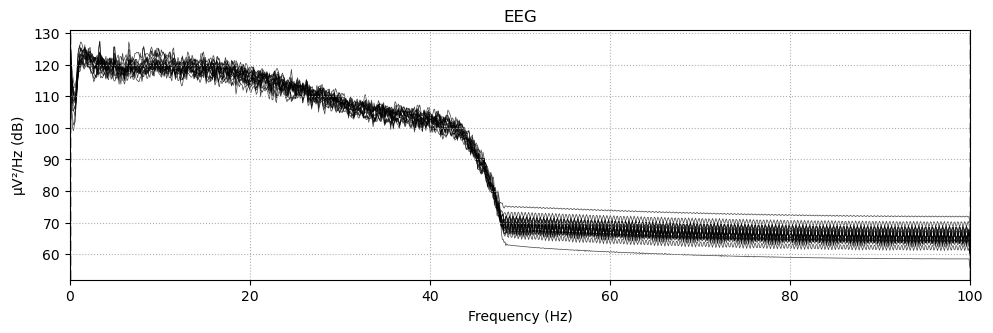

In [8]:
# 绘制功率谱密度图
raw.plot_psd()

# 预处理

In [9]:
# #电极定位
# raw.set_montage(montage='standard_1020')
# 加载电极位置信息
montage = mne.channels.make_standard_montage('standard_1020')

# 将电极位置信息应用于 Raw 对象
raw.set_montage(montage)


<RawArray | 16 x 35732 (178.7 s), ~4.4 MB, data loaded>

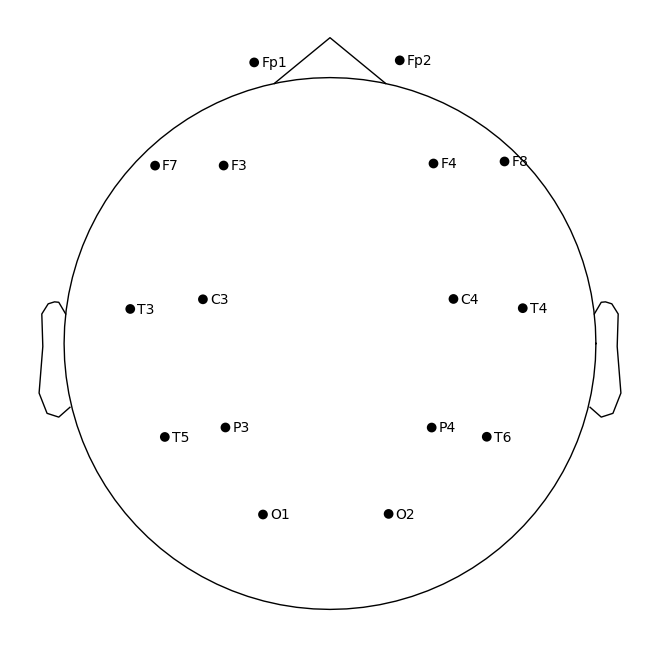

In [10]:
raw.plot_sensors(show_names=True)

In [11]:
#重参考
raw_ref = raw.copy()
raw_ref.load_data()
raw_ref.set_eeg_reference(ref_channels='average')
raw_ref.plot(n_channels=16, scalings=scalings, title='重参考完成，无误请关闭窗口', show=True)  # block=True
plt.show()

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Opening raw-browser...


In [12]:
#滤波
raw_filter = raw_ref.copy()
raw_filter.filter(l_freq=1,h_freq=50)
raw_filter.notch_filter(freqs=50)
raw_filter.plot_psd(fmax=100)
plt.show(block=False)
raw_filter.plot(n_channels=16, scalings=scalings, title='滤波完成，准备ICA，无误请关闭窗口')  # ,block=True

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 661 samples (3.305 sec)

Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 

D:\miniconda3\envs\pytorch\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,
D:\miniconda3\envs\pytorch\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,
D:\miniconda3\envs\pytorch\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,
D:\miniconda3\envs\pytorch\lib\site-packages\mne\filter.py:312: DeprecationWarning: Keyword argument 'nyq' is deprecated in favour of 'fs' and will be removed in SciPy 1.12.0.
  this_h = firwin(this_N, (prev_freq + this_freq) / 2.,


Opening raw-browser...


In [13]:
#ICA
ica = mne.preprocessing.ICA(n_components=10, method='picard', max_iter=800)
ica.fit(raw_filter)
raw_filter.load_data()
ica.plot_components()

ica.plot_sources(raw_filter, show_scrollbars=False, title='请选择需要去除的成分')  # , block=True
plt.show()

Fitting ICA to data using 16 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 0.7s.
Creating RawArray with float64 data, n_channels=10, n_times=35732
    Range : 0 ... 35731 =      0.000 ...   178.655 secs
Ready.
Opening ica-browser...


In [14]:
print(ica)

<ICA | raw data decomposition, method: picard (fit in 52 iterations on 35732 samples), 10 ICA components explaining 99.2 % of variance (16 PCA components available), channel types: eeg, no sources marked for exclusion>


In [15]:
raw_recons = raw_filter.copy()
raw_recons = ica.apply(raw_recons)
raw_filter.plot(n_channels=16, scalings=scalings,title='ICA处理前, 确认请关闭')
raw_recons.plot(n_channels=16, scalings=scalings,title='ICA处理后, 确认请关闭')
plt.show()  # block=True

Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 0 ICA components
    Projecting back using 16 PCA components
Opening raw-browser...
Opening raw-browser...
